In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_blobs
from sklearn import svm
from sklearn.datasets import make_blobs


In [2]:
# Génère trois nuages de points 2D

# Nombre de points dans chaque nuage
r1, r2, r3 = 0.3, 0.3, 0.4
n_pts = 1000
n1 = int(r1*n_pts)
n2 = int(r2*n_pts)
n3 = int(r3*n_pts)

# Positions et dispersion des nuages  
centers = [(-5, 0), (-1, 4), (4, 2)]
cluster_std = [0.5, 0.5, 0.5]

X, y = make_blobs(n_samples=[n1, n2, n3], centers=centers, cluster_std = cluster_std, n_features=2, \
                  shuffle=False, random_state=42)


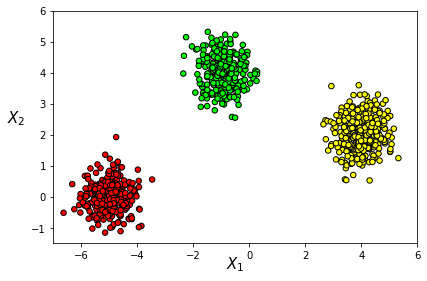

In [3]:
# Affichage des nuages de points

# Voisinage autour des trois nuages de points
x_min, x_max = -7., 6.
y_min, y_max = -1.5, 6.

cm_bright = ListedColormap(['#FF0000', '#00FF00', '#FFFF00'])

fig, ax = plt.subplots()

plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=cm_bright,
            edgecolors='k')
plt.axis([x_min, x_max, y_min, y_max],'equal')
plt.ylabel('$X_{2}$', rotation=0, fontsize=15)
plt.xlabel('$X_{1}$', fontsize=15)
ax.yaxis.set_label_coords(-0.1,0.5)
ax.xaxis.set_label_coords(0.5, -0.05)
plt.tight_layout()
plt.show()

In [4]:
# Classification des trois nuages avec un SVM nonlinéaire avec noyau RBF

# Classifie les nuages de points
clf = svm.NuSVC(gamma='auto',probability=True)
clf.fit(X, y)


NuSVC(gamma='auto', probability=True)

In [5]:
# Calcul de la probabibilité locale d'appartenance à l'une des trois classes. 

# Grillage de points 2D dans le voisinage des nuages de points
n = 200;
xx, yy = np.meshgrid(np.linspace(x_min, x_max, n),
                     np.linspace(y_min, y_max, n))

# Calcul de la probabibilité d'appartenance pour chaque classe en chaque point de la grille
prob = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])

# Classe ayant la plus grande probabilité locale
prob = np.max(prob,axis=1)
prob = prob.reshape(xx.shape)


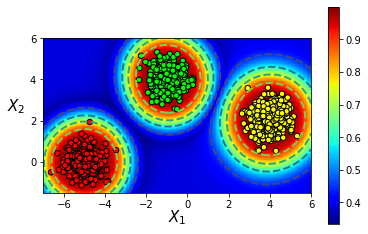

In [6]:
# Affichage de la distribution de probabilité d'appartenance à chaque classe

cm_bright = ListedColormap(['#FF0000', '#00FF00', '#FFFF00'])

fig, ax = plt.subplots()

im = ax.imshow(prob, interpolation='nearest',
           extent=(x_min, x_max, y_min, y_max), aspect='equal',
           origin='lower', cmap='jet')

contours = ax.contour(xx, yy, prob, levels=5, linewidths=2,
                       linestyles='dashed')
fig.colorbar(im, ax=ax)

ax.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=cm_bright,
            edgecolors='k')
ax.axis([x_min, x_max, y_min, y_max],'equal')
plt.ylabel('$X_{2}$', rotation=0, fontsize=15)
plt.xlabel('$X_{1}$', fontsize=15)
ax.yaxis.set_label_coords(-0.1,0.5)
ax.xaxis.set_label_coords(0.5, -0.1)

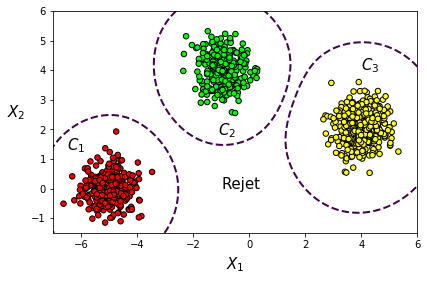

In [7]:
# Affichage du domaine de chaque classificateur tel que défini par Prob(ci) > 0.5

cm_bright = ListedColormap(['#FF0000', '#00FF00', '#FFFF00'])

fig, ax = plt.subplots()

contours = plt.contour(xx, yy, prob, levels=[0.5], linewidths=2,
                       linestyles='dashed')
plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=cm_bright,
            edgecolors='k')

plt.axis([x_min, x_max, y_min, y_max],'equal')

plt.ylabel('$X_{2}$', rotation=0, fontsize=15)
plt.xlabel('$X_{1}$', fontsize=15)
ax.yaxis.set_label_coords(-0.1,0.5)
ax.xaxis.set_label_coords(0.5, -0.1)

plt.text(-6.5, 1.3, '$C_{1}$', fontsize=15)
plt.text(-1.1, 1.8, '$C_{2}$', fontsize=15)
plt.text(4., 4, '$C_{3}$', fontsize=15)
plt.text(-1, 0, 'Rejet', fontsize=15)


plt.tight_layout()
plt.show()

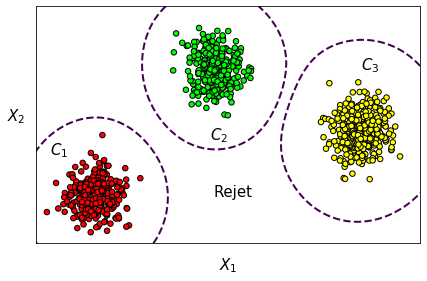

In [8]:
# Sauvegarde de l'image pour les notes de cours

cm_bright = ListedColormap(['#FF0000', '#00FF00', '#FFFF00'])

fig, ax = plt.subplots()

contours = plt.contour(xx, yy, prob, levels=[0.5], linewidths=2,
                       linestyles='dashed')
plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=cm_bright,
            edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis([x_min, x_max, y_min, y_max],'equal')

plt.ylabel('$X_{2}$', rotation=0, fontsize=15)
plt.xlabel('$X_{1}$', fontsize=15)
ax.yaxis.set_label_coords(-0.05,0.5)
ax.xaxis.set_label_coords(0.5, -0.05)

plt.text(-6.5, 1.3, '$C_{1}$', fontsize=15)
plt.text(-1.1, 1.8, '$C_{2}$', fontsize=15)
plt.text(4., 4, '$C_{3}$', fontsize=15)
plt.text(-1, 0, 'Rejet', fontsize=15)

plt.tight_layout()

plt.savefig("C:/Users/pgsci/OneDrive/Documents/IID/Introduction à l’apprentissage machine    Christian Gagné/Figures/iam-sem02-bayes/Figure_20_20.svg", format="svg")

plt.show()